In [13]:
import numpy as np
import dicom
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import sklearn, sklearn.preprocessing
%matplotlib inline

In [14]:
def cropHeart(inp):
    """
    Crop the heart so that all the padding is done away with.
    Output cropped heart.
    """
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(inp)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = inp[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1,   # inclusive
          top_left[2]:bottom_right[2]+1]  
    print(out.shape, "cropped from", inp.shape)
    return out

def plotHeart(inData, cols):
    fig, ax = plt.subplots(cols,cols)
    k = 0
    fig.suptitle("Slices of heart data")
    for i in np.arange(cols):
        for j in np.arange(cols):
            ax[i,j].imshow(inData[k])
            ax[i,j].axis("off")
            k = k + inData.shape[0]/(cols**2) +1
    print(k)

In [15]:
ds0 = dicom.read_file("./data/nlst/7/RESTRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.149242122.1391620200.dcm")
px0 = ds0.pixel_array

ds1 = dicom.read_file("./data/nlst/7/STRESSRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.1793586668.13916201980.dcm")
px1 = ds1.pixel_array

In [43]:
cropped = cropHeart(px1)
#plotHeart(cropped, 3)
cropped0 = cropHeart(px0)

((23, 15, 23), 'cropped from', (37, 64, 64))
((23, 16, 22), 'cropped from', (36, 64, 64))


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 6 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 7 6 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0

    0   0   0   0   0]]
[[  0   0   0   0   1   2   8  30  37  45  52  54  49  40  30  19   1   1
    0   0   0   0   0]
 [  0   0   0   5  39  64  73  77  80  86  97 100  87  60  35  25  28  31
   18   0   0   0   0]
 [  0   0   0  64  77  95 121 137 140 139 147 155 141 105  64  39  32  34
   34  22   0   0   0]
 [  0  10  71  75  78 106 150 177 174 158 158 174 177 156 113  72  46  36
   33  32  19   1   0]
 [  3  70  87  74  74 107 160 186 166 130 123 149 177 185 156 109  66  45
   39  37  38  28   0]
 [  8  87  90  77  78 115 170 187 147  95  84 117 161 190 180 138  87  57
   48  46  45  27   1]
 [ 48  81  87  78  79 117 176 194 148  89  74 106 151 187 189 154 104  68
   53  49  47  42  19]
 [ 60  77  85  75  69 100 165 198 166 111  90 115 154 188 191 160 112  76
   57  50  47  42  25]
 [ 60  86  92  78  62  77 137 187 185 149 129 145 174 194 184 148 108  78
   61  54  51  48  26]
 [ 15  87  94  84  68  73 116 168 194 185 173 179 189 184 156 118  87  68
   56  51  52  40   5]
 [  4 

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9 24 25 28  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7 17 19 22  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8 17 19 21  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11 27 29 29  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15 37 40 39  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

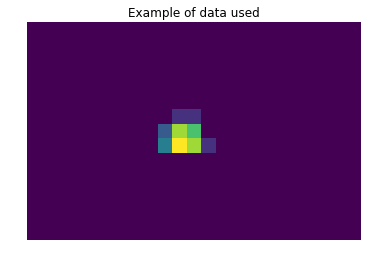

In [38]:
#for i in np.arange(cropped.shape[0]):
#    cropped[i] = sklearn.preprocessing.normalize(cropped[i])

fig = plt.figure()
data = cropped[0]
im = plt.imshow(data)

def animate(i):
    data = cropped[i]
    im.set_data(data)
    print(data)
    return im

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(cropped.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example.mp4")

(23, 15, 23)

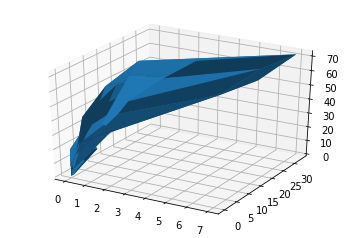

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(cropped[0],cropped[1],cropped[2])
cropped.shape

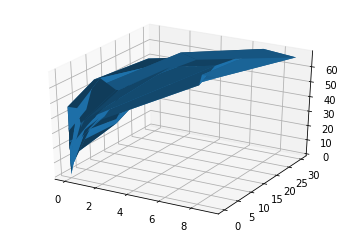

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(cropped0[0],cropped0[1],cropped0[2])